Importações

In [4469]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

Carregando os dados

In [4466]:

caminho = 'viajou-tratado copy.xlsx'
df = pd.read_excel(caminho)
df

,idade,genero,municipio_residencia,visita_pontos_turisticos,participa_eventos,frequencia_eventos,tipos_eventos_preferidos,participa_excursões,frequencia_tours_virtuais,frequencia_apps_turismo,usou_apps_turismo,confianca_avaliacoes,interesse_acessibilidade,pagaria_por_tour_virtual,descoberta_eventos_atracoes,motivacao_uso_app_turismo,probabilidade_recomendar
0,Menor de 18 anos,Feminino,São Paulo,Sim,Sim,Ocasionalmente,['Teatrais'],Não,Nunca,Ocasionalmente,Sim,3,"Sim, mas não é essencial","Não, prefiro gastar em outra coisa",['Redes Sociais'],Encontrar Novas Experiências,3
1,Menor de 18 anos,Masculino,São Paulo,Não,Sim,Ocasionalmente,"['Eletrônicos', 'Gastronômicos', 'Musicais']",Não,Nunca,Raramente,Sim,5,"Sim, mas não é essencial","Sim, se o preço for acessível","['Recomendações de Amigos e Família', 'Redes S...",Obter Informações Detalhadas,4
2,Menor de 18 anos,Feminino,São Paulo,Não,Não,Raramente,['Gastronômicos'],Não,Nunca,Raramente,Sim,4,"Sim, mas não é essencial","Sim, se o preço for acessível","['Recomendações de Amigos e Família', 'Redes S...",Encontrar Novas Experiências,4
3,Mais de 55 anos,Feminino,São Paulo,Sim,Não,Ocasionalmente,"['Culturais', 'Musicais']",Não,Raramente,Ocasionalmente,Sim,3,"Sim, é muito importante pra mim.","Sim, se o preço for acessível",['Agências de Viagem e Operadoras de Turismo'],Obter Informações Detalhadas,3
4,Menor de 18 anos,Outro,Osasco,Sim,Sim,Ocasionalmente,"['Culturais', 'Musicais', 'Teatrais']",Sim,Raramente,Raramente,Não,4,"Sim, é muito importante pra mim.","Talvez, depende da situação","['Recomendações de Amigos e Família', 'Redes S...",Encontrar Novas Experiências,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Mais de 55 anos,Masculino,São Paulo,Não,Não,Raramente,"['Esportivos', 'Gastronômicos']",Não,Nunca,Nunca,Não,4,"Sim, mas não é essencial","Não, prefiro gastar em outra coisa",['Recomendações de Amigos e Família'],Receber Recomendações Personalizadas,3
109,35-44 anos,Masculino,Osasco,Não,Sim,Mensalmente,"['Esportivos', 'Gastronômicos']",Sim,Raramente,Sempre que saio.,Sim,4,"Sim, é muito importante pra mim.","Sim, se o preço for acessível",['Aplicativos de Turismo'],Reservar Ingressos e Excursões,1
110,25-34 anos,Feminino,São Paulo,Sim,Sim,Ocasionalmente,"['Eletrônicos', 'Esportivos', 'Gastronômicos',...",Não,Ocasionalmente,Ocasionalmente,Sim,4,"Sim, mas não é essencial","Não, prefiro gastar em outra coisa","['Recomendações de Amigos e Família', 'Redes S...",Reservar Ingressos e Excursões,2
111,Mais de 55 anos,Feminino,São Paulo,Sim,Sim,Ocasionalmente,['Culturais'],Não,Ocasionalmente,Frequentemente,Sim,5,"Sim, mas não é essencial","Sim, se o preço for acessível","['Agências de Viagem e Operadoras de Turismo',...",Obter Informações Detalhadas,4


Separando dados em características e alvo

In [4467]:
X = df.drop('probabilidade_recomendar', axis=1)
y = df['probabilidade_recomendar']

,idade,genero,municipio_residencia,visita_pontos_turisticos,participa_eventos,frequencia_eventos,tipos_eventos_preferidos,participa_excursões,frequencia_tours_virtuais,frequencia_apps_turismo,usou_apps_turismo,confianca_avaliacoes,interesse_acessibilidade,pagaria_por_tour_virtual,descoberta_eventos_atracoes,motivacao_uso_app_turismo
0,Menor de 18 anos,Feminino,São Paulo,Sim,Sim,Ocasionalmente,['Teatrais'],Não,Nunca,Ocasionalmente,Sim,3,"Sim, mas não é essencial","Não, prefiro gastar em outra coisa",['Redes Sociais'],Encontrar Novas Experiências
1,Menor de 18 anos,Masculino,São Paulo,Não,Sim,Ocasionalmente,"['Eletrônicos', 'Gastronômicos', 'Musicais']",Não,Nunca,Raramente,Sim,5,"Sim, mas não é essencial","Sim, se o preço for acessível","['Recomendações de Amigos e Família', 'Redes S...",Obter Informações Detalhadas
2,Menor de 18 anos,Feminino,São Paulo,Não,Não,Raramente,['Gastronômicos'],Não,Nunca,Raramente,Sim,4,"Sim, mas não é essencial","Sim, se o preço for acessível","['Recomendações de Amigos e Família', 'Redes S...",Encontrar Novas Experiências
3,Mais de 55 anos,Feminino,São Paulo,Sim,Não,Ocasionalmente,"['Culturais', 'Musicais']",Não,Raramente,Ocasionalmente,Sim,3,"Sim, é muito importante pra mim.","Sim, se o preço for acessível",['Agências de Viagem e Operadoras de Turismo'],Obter Informações Detalhadas
4,Menor de 18 anos,Outro,Osasco,Sim,Sim,Ocasionalmente,"['Culturais', 'Musicais', 'Teatrais']",Sim,Raramente,Raramente,Não,4,"Sim, é muito importante pra mim.","Talvez, depende da situação","['Recomendações de Amigos e Família', 'Redes S...",Encontrar Novas Experiências
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Mais de 55 anos,Masculino,São Paulo,Não,Não,Raramente,"['Esportivos', 'Gastronômicos']",Não,Nunca,Nunca,Não,4,"Sim, mas não é essencial","Não, prefiro gastar em outra coisa",['Recomendações de Amigos e Família'],Receber Recomendações Personalizadas
109,35-44 anos,Masculino,Osasco,Não,Sim,Mensalmente,"['Esportivos', 'Gastronômicos']",Sim,Raramente,Sempre que saio.,Sim,4,"Sim, é muito importante pra mim.","Sim, se o preço for acessível",['Aplicativos de Turismo'],Reservar Ingressos e Excursões
110,25-34 anos,Feminino,São Paulo,Sim,Sim,Ocasionalmente,"['Eletrônicos', 'Esportivos', 'Gastronômicos',...",Não,Ocasionalmente,Ocasionalmente,Sim,4,"Sim, mas não é essencial","Não, prefiro gastar em outra coisa","['Recomendações de Amigos e Família', 'Redes S...",Reservar Ingressos e Excursões
111,Mais de 55 anos,Feminino,São Paulo,Sim,Sim,Ocasionalmente,['Culturais'],Não,Ocasionalmente,Frequentemente,Sim,5,"Sim, mas não é essencial","Sim, se o preço for acessível","['Agências de Viagem e Operadoras de Turismo',...",Obter Informações Detalhadas


Substituindo os valores 1 e 2 por 0, e 3 e 4 por 1

In [4440]:
y = y.replace({1: 0, 2: 0, 3: 1, 4: 1})

Identificar colunas categóricas

In [4441]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

Preprocessamento

In [4442]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    force_int_remainder_cols=False,
    remainder='passthrough'
)

Definição e treinamento do modelo

In [4443]:
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='log2', min_samples_leaf=5, min_samples_split=2, splitter='random')

Criando o pipeline

In [4444]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

Divisão dos dados em treino e teste

In [4445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Treinando o pipeline

In [4446]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['idade', 'genero',
                                                   'municipio_residencia',
                                                   'visita_pontos_turisticos',
                                                   'participa_eventos',
                                                   'frequencia_eventos',
                                                   'tipos_eventos_preferidos',
                                                   'participa_excursões',
                                                   'frequencia_tours_virtuais',
                                                   'frequencia_apps_turismo',
                                                   'usou_apps_turismo',
                                                   'interesse_acessibilidade',
                                                   'pagaria_por_tour_virtual',
                                                   'descoberta_eventos_atracoes',
                                                   'motivacao_uso_app_turismo'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, max_features='log2',
                                        min_samples_leaf=5,
                                        splitter='random'))])

Salvando o modelo

In [4447]:
joblib.dump(model_pipeline, 'modelo_com_preprocessador.joblib')

['modelo_com_preprocessador.joblib']

Avaliação do modelo

In [4448]:
y_pred = model_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8529411764705882
Confusion Matrix:
 [[ 4  4]
 [ 1 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.86      0.96      0.91        26

    accuracy                           0.85        34
   macro avg       0.83      0.73      0.76        34
weighted avg       0.85      0.85      0.84        34



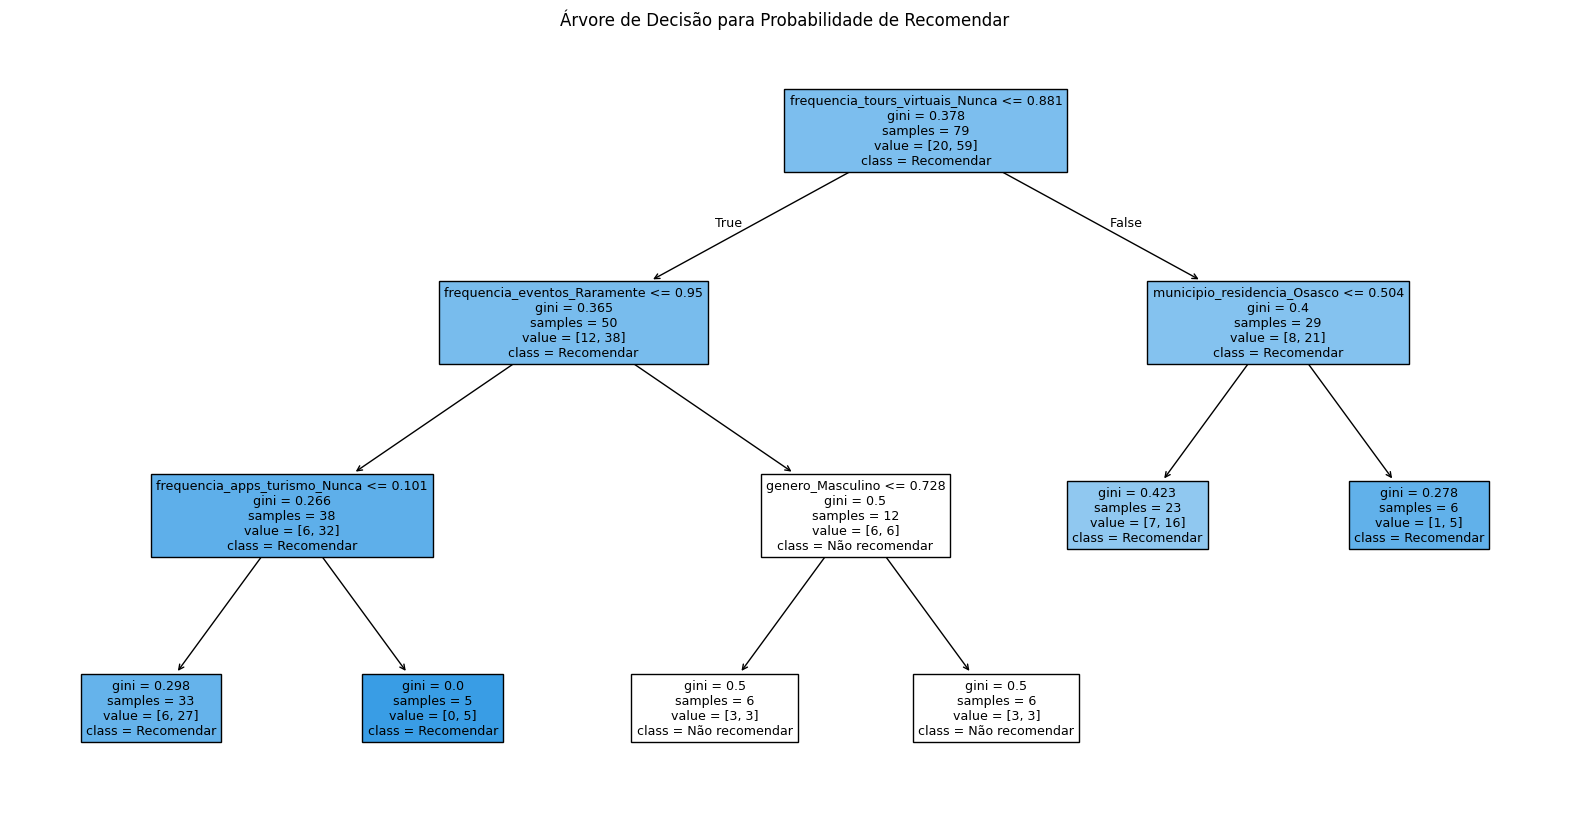

In [4465]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Carregar o modelo salvo
model_pipeline_loaded = joblib.load('modelo_com_preprocessador.joblib')

# Extrair o classificador Decision Tree do pipeline
decision_tree_model = model_pipeline_loaded.named_steps['classifier']

# Obter nomes das características após a transformação OneHotEncoder
ohe_columns = model_pipeline_loaded.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()
feature_names = list(ohe_columns) + [col for col in X.columns if col not in categorical_features]

# Plotando a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=feature_names, class_names=["Não recomendar", "Recomendar"], filled=True)
plt.title("Árvore de Decisão para Probabilidade de Recomendar")
plt.show()

In [4471]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Configurando o tamanho da figura
plt.figure(figsize=(10, 8))

# Criando o heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Adicionando títulos e labels
plt.title('Matriz de Correlação')
plt.show()

ValueError: could not convert string to float: 'Menor de 18 anos'